In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
from sklearn.cluster import DBSCAN
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv",parse_dates=['Date/Time'])

df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [3]:
#Renaming columns
df.columns = [x.lower().replace('/', '_') for x in df.columns]
df.head()

,date_time,lat,lon,base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [4]:
df['year'] = df.date_time.dt.year
df['month'] = df.date_time.dt.month
df['day'] = df.date_time.dt.dayofweek
df['hour'] = df.date_time.dt.hour

df.sample(5)


,date_time,lat,lon,base,year,month,day,hour
151019,2014-04-22 23:03:00,40.8341,-73.9431,B02598,2014,4,1,23
355454,2014-04-04 16:56:00,40.6970,-73.9970,B02682,2014,4,4,16
274393,2014-04-16 15:06:00,40.6450,-73.7819,B02617,2014,4,2,15
373092,2014-04-06 13:19:00,40.8175,-73.9390,B02682,2014,4,6,13
259041,2014-04-11 17:08:00,40.7480,-73.9806,B02617,2014,4,4,17


In [6]:
# Null values check
df.isnull().sum()/df.shape[0]*100


date_time    0.0
lat          0.0
lon          0.0
base         0.0
year         0.0
month        0.0
day          0.0
hour         0.0
dtype: float64

# Clustering 


In [7]:
X = df.loc[:, ['lat', 'lon']]
X.head()


,lat,lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


In [10]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[7 0 0 ... 1 9 9]


In [12]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(X)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[ 0.8035544 ,  0.43463557],
       [-0.36873718, -1.14392195],
       [-0.23293981, -0.20789287],
       [ 0.52087416, -0.01553096],
       [ 0.53750241,  0.09155711]])

K-Means


In [13]:
# Import K-Means 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, init="k-means++")

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [15]:
## Apply standard scaler 
X = sc.transform(X)

## Get cluster 
c = kmeans.predict(X)
print("C belongs to cluster: {}".format(c[0]))

C belongs to cluster: 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
# Let's create a loop that will collect the Within-sum-of-square (wcss) for each value K 
# Let's use .inertia_ parameter to get the within sum of square value for each value K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 655586760.8403352
WCSS for K=2 --> 437230869.8008866
WCSS for K=3 --> 306685975.3765108
WCSS for K=4 --> 247860542.87237442
WCSS for K=5 --> 194951477.785286
WCSS for K=6 --> 165871046.62543052
WCSS for K=7 --> 134751520.23583937
WCSS for K=8 --> 115518645.26812536
WCSS for K=9 --> 98272962.29165646
WCSS for K=10 --> 87112920.90616895


In [16]:
# Let's visualize using plotly
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render

fig.show()

NameError: ignored

In [ ]:
fig = px.scatter_mapbox(
        df.sample(10000).sort_values(by='hour', ascending=True),
        lat="lat", 
        lon="lon",
        color="day",
        mapbox_style="carto-positron",
        zoom=11.6,
        # opacity=0.5,
        animation_frame='hour',
        animation_group='day',
        
        color_continuous_scale = 'tropic'
        # TimeSquare = (-73.985130, 40.758896)

)
#ADD SPECIFIC POINTS
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    )
fig.show()
# 

<AxesSubplot:>

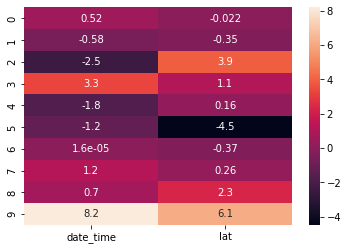

In [ ]:
# Cluster centers coordinates
# Let's use inverse transform to have the real coordinates 
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

# Let's get column names to facilita understanding 
labels = 'date_time' ,'lat'

# Create a heatmap 
sns.heatmap(pd.DataFrame(cluster_centers, columns=labels),  annot=True)

In [17]:
kmeans = KMeans (n_clusters = 3 , max_iter = 300 , random_state = 123454)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=123454)

In [18]:
#Stroing Cluster Centroids

centroids = kmeans.cluster_centers_
centroids

array([[-33950.52868168,  31002.85097161],
       [-31806.80598864,  30646.88470674],
       [-32666.57412738,  30403.31366243]])

In [19]:
#create dataframe from the cluster
Y = pd.DataFrame(data=centroids, columns=["Lat", "Lon"])
Y

,Lat,Lon
0,-33950.528682,31002.850972
1,-31806.805989,30646.884707
2,-32666.574127,30403.313662


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



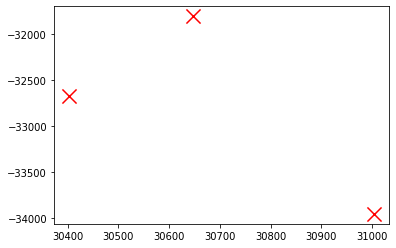

In [20]:
#plotting the 3 centroids 

plt.scatter(Y['Lon'],Y['Lat'], marker = "x", color ='R', s = 200)
plt.show()


In [ ]:
#Converting centroid into lists
centroid = Y.values.tolist()
import folium
#plotting the centroids on google map using Folium library
map = folium.Map(location=[40.7654, -73.9726], zoom_start = 12)
for i in range (0 , len(centroid)):
  folium.Marker(centroid[i]).add_to(map)
map

In [44]:

new = df._get_numeric_data().dropna(axis=1)
kmeans.fit(new)
predict=kmeans.predict(new)
df['clusters'] = pd.Series(predict, index=df.index)
df.head(3)

,lat,lon,year,month,day,hour,clusters
0,40.7690,-73.9549,2014,4,1,0,1
1,40.7267,-74.0345,2014,4,1,0,1
2,40.7316,-73.9873,2014,4,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



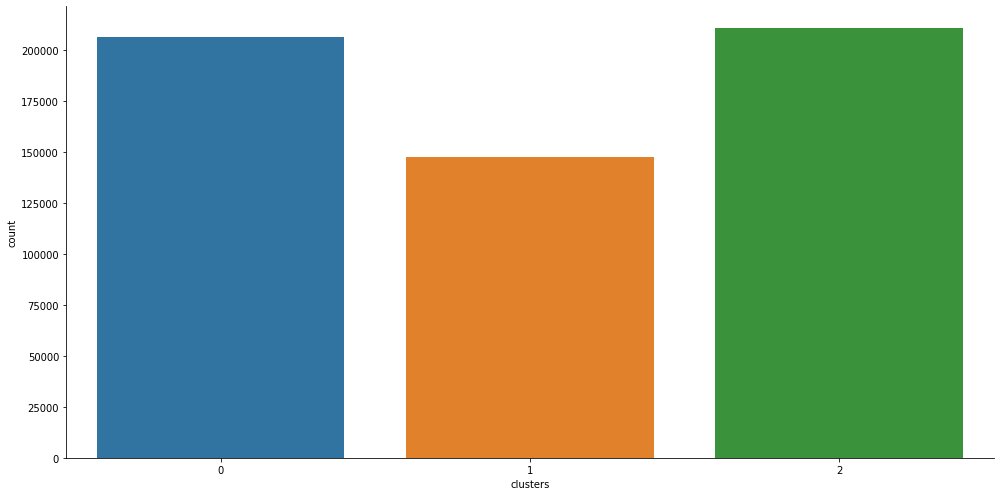

In [34]:
sns.factorplot(data = df , x='clusters', kind ='count' ,size =7, aspect = 2)

DBSCAN

In [45]:
df= df.drop('date_time', axis=1)
df= df.drop('base', axis=1)
df.head()

KeyError: ignored

In [46]:
df1 =df.sample (500)
df1.head()

,lat,lon,year,month,day,hour,clusters
288420,40.8446,-73.9817,2014,4,0,3,1
457752,40.7288,-73.9762,2014,4,4,7,1
134463,40.7625,-73.9729,2014,4,5,17,2
277276,40.7647,-73.9574,2014,4,3,9,1
355267,40.7587,-73.9737,2014,4,4,16,2


In [48]:
# import DBSCAN from sklearn and numpy
from sklearn.cluster import DBSCAN
# Instanciate DBSCAN 
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean", algorithm="brute")


In [54]:
# Fit on data 
## No need to normalize data, it already is! 
db.fit(df1)

DBSCAN(algorithm='brute', eps=0.2)

In [52]:
## Import go to build our own figure
import plotly.graph_objects as go

fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

IndexError: ignored

In [39]:
# Fit on data 
## No need to normalize data, it already is! 
db.fit(df1)


DBSCAN(algorithm='brute', eps=0.2)